# 3.1 序列分类任务

基于 GPT-2 模型，可以通过微调（fine-tuning）或使用提示（prompt-based）方法来完成多种下游任务。
本章主要使用经典的微调方式，提示微调则属于chatgpt的范围，放在下一章，以下是几种常见的下游任务及其简单描述：


### 1. **文本分类**

#### 任务描述

文本分类是将文本分配到一个或多个预定义类别中的任务。例如，情感分析、主题分类等。生物序列中对应如启动序列等分类问题。

#### 使用的模型类型

- **GPT2ForSequenceClassification或AutoModelForSequenceClassification**：该模型在 GPT-2 的基础上添加了一个分类头，用于处理文本分类任务。通过微调这个模型，可以将其应用于多种分类任务。

### 2. **机器翻译**

#### 任务描述

机器翻译是指将一种语言的文本转换为另一种语言的过程。生物学中，可以是生物序列到功能描述(英文)的翻译。

#### 使用的模型类型

- **AutoModelForSeq2SeqLM**：虽然 GPT-2 不是专门为机器翻译设计的模型，但可以通过构造特定格式的提示，让 GPT-2 根据上下文生成目标语言的翻译结果。
- **注意**：对于机器翻译任务，通常更推荐使用专门为此类任务设计的模型，如 T5 或 mBART。

### 3. **词性标注 (POS Tagging)**

#### 任务描述

词性标注是指为每个单词分配其正确的词性标签（如名词、动词、形容词等）。生物学中，对应于结构预测任务，典型的如二级结构预测。

#### 使用的模型类型

- **AutoModelForTokenClassification**：该模型适用于标记级别的分类任务。通过微调，可以将 GPT-2 应用于词性标注，每个 token 的隐藏状态会被映射到相应的词性标签。

### 4. **命名实体识别 (NER)**

#### 任务描述

命名实体识别是指识别文本中的人名、地名、组织机构等实体，并对其进行分类。生物学中，也对应于结构预测任务，典型的如膜结构预测。和词性标注类似。

#### 使用的模型类型

- **AutoModelForTokenClassification**：类似于词性标注，该模型可以用于 NER 任务，通过对每个 token 进行分类来识别和标注命名实体。

### 5. **问答系统**

#### 任务描述

问答系统旨在根据给定的问题从文档或知识库中提取答案。目前一些最新的生物学大模型论文中，输入是包含生物序列的问题，回答则也是混合式的。一般是生物学领域的QA。

#### 使用的模型类型

- **AutoModelForQuestionAnswering**：该模型专门用于问答任务，能够理解问题并从上下文中提取答案。通过微调，它可以适应特定领域的问答需求。

### 6. **文本生成**

#### 任务描述

文本生成是指根据给定的提示或前缀生成连贯的文本内容。生物学中，对应新的序列生成，如产生全新的蛋白质序列。

#### 使用的模型类型

- **GPT2LMHeadModel**：这是 GPT-2 的标准语言模型版本，擅长生成自然流畅的文本。它可以根据输入的提示生成后续文本，广泛应用于创作、对话系统等领域。

### 6. **回归问题**

#### 任务描述

生物序列相关的回归问题，输入为序列，输出为一个float值。

#### 使用的模型类型

- huggingface没有特定的header，但一般回归问题，输出使用一个线性层即可，设定损失函数为均方误差（MSE）即可。最简单的，就是使用AutoModelForTokenClassification，类别数设置为1，输出的label为实测float值即可。
一个官方推荐的 [例子](https://github.com/huggingface/transformers/blob/7ae6f070044b0171a71f3269613bf02fd9fca6f2/src/transformers/models/bert/modeling_bert.py#L1564-L1575)

### 小结

GPT-2 可以通过微调或提示工程应用于多种下游任务。不同的任务需要使用特定类型的模型，这些模型基于 GPT-2 并添加了额外的组件或进行了调整，以更好地适应特定的任务需求

<img src="img/gpt2-ft.png" width="800px" />

In [1]:
import subprocess
import os
# 设置环境变量, autodl一般区域
result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value

"""
import os

# 设置环境变量, autodl专区 其他idc
os.environ['HF_ENDPOINT'] = 'https://hf-mirror.com'

# 打印环境变量以确认设置成功
print(os.environ.get('HF_ENDPOINT'))
"""

"\nimport os\n\n# 设置环境变量, autodl专区 其他idc\nos.environ['HF_ENDPOINT'] = 'https://hf-mirror.com'\n\n# 打印环境变量以确认设置成功\nprint(os.environ.get('HF_ENDPOINT'))\n"

In [2]:
from transformers import AutoTokenizer, AutoModel
from tokenizers import Tokenizer
from transformers import GPT2LMHeadModel, AutoConfig,GPT2Tokenizer
from transformers import AutoModelForSequenceClassification
from transformers import DataCollatorWithPadding

In [6]:
#set tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("dnagpt/dna_gpt2_v0")
tokenizer.pad_token = tokenizer.eos_token

tokenizer_config.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/642k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/323k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

In [3]:
#set model
model = AutoModelForSequenceClassification.from_pretrained('dnagpt/dna_gpt2_v0', num_labels=2)
model.config.pad_token_id = model.config.eos_token_id
model

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at dnagpt/dna_gpt2_v0 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(30000, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (score): Linear(in_features=768, out_features=2, bias=False)
)

在生物学中，**启动子（promoter）** 是一段特定的DNA序列，它位于基因的上游（通常是5'端），并且是转录起始的关键调控元件。启动子的主要功能是为RNA聚合酶提供结合位点，并招募其他转录因子，以启动基因转录过程。以下是关于启动子的一些重要概念和特点：

### 启动子的功能

1. **转录起始**：
   - 启动子是基因表达的第一步，它决定了何时、何地以及多频繁地进行转录。
   
2. **调控基因表达**：
   - 不同类型的启动子可以调节不同组织或细胞类型中的基因表达水平。例如，在某些细胞中高度活跃而在其他细胞中不活跃。

3. **与转录因子和其他蛋白质相互作用**：
   - 启动子区域通常包含多个顺式作用元件（cis-regulatory elements），这些元件可以与特定的转录因子或其他调控蛋白结合，进一步精细调整基因表达。
  
  
在生物学中，启动子（promoter）序列的二分类问题通常是指将DNA序列分为两类：**启动子序列**和**非启动子序列**。这种分类任务的目标是通过机器学习或生物信息学方法来预测给定的DNA序列是否具有启动子功能。

### 二分类问题中的两个类别

1. **启动子序列（Promoter Sequences）**：
   - 这些序列包含能够指导转录起始的调控元件，通常是位于基因5'端上游区域的一段DNA。
   - 启动子序列可能含有特定的保守基序（motifs），如TATA盒、CAAT盒等，这些基序对于RNA聚合酶及其辅助因子的结合至关重要。

2. **非启动子序列（Non-Promoter Sequences）**：
   - 这类序列指的是那些不具有启动子功能的DNA片段。它们可以来自基因内部（编码区或内含子）、基因间区域（intergenic regions）或其他调控元件（如增强子、沉默子等），但明确不是启动子。
   - 非启动子序列不具备启动转录的能力，或者至少在自然条件下不会作为主要的转录起始点。

### 启动子的研究意义

理解启动子的工作机制对于揭示基因表达调控网络非常重要。这不仅有助于基础科学研究，而且对于医学应用也有着深远的影响，比如开发新的治疗策略来纠正异常的基因表达模式，或者利用合成生物学设计定制化的基因表达系统。


In [8]:
from datasets import load_dataset
# 1. load ~11k samples from promoters prediction dataset
dataset = load_dataset("dnagpt/dna_promoter_300")['train'].train_test_split(test_size=0.1)

README.md:   0%|          | 0.00/314 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/59195 [00:00<?, ? examples/s]

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sequence', 'label'],
        num_rows: 53275
    })
    test: Dataset({
        features: ['sequence', 'label'],
        num_rows: 5920
    })
})

In [10]:
dataset["train"][0]

{'sequence': 'CCTGACGCCCACCGCAAGCTGCCGGGTAAGACCGGGTCGACTTCAGCGCGGCCCGCTGCACGAGAGACCATTATGGTGATCCGCCCGCCTGACACTACTGATATGTTGGGATTACAGGCGTGAGCCACGGCGCCCGGCGGGCAAGACACCCTCAGAGCACAGGGTGAATCCATGGTTAAAATACAGCGGGAAGTTAGCGCCGAAGTCGCCGTGTAATTTGTGCGCGGTTCAGGTTCATGTATTCAGAATCATTTTACTAGGTTTAGGGCTCGCCGCTGCCTCAGTGGCTTTCAGGCGCTT',
 'label': 0}

In [13]:
token_len_list = []
for item in dataset["test"]:
    inputs = tokenizer.tokenize(item["sequence"])
    token_len_list.append( len(inputs) )

mean_len = sum(token_len_list)/len(token_len_list)
min_len  = min(token_len_list)
max_len = max(token_len_list)

print("dna datasets ", "mean token lenght", mean_len, "min token length", min_len, "max token length", max_len)

dna datasets  mean token lenght 52.41266891891892 min token length 33 max token length 60


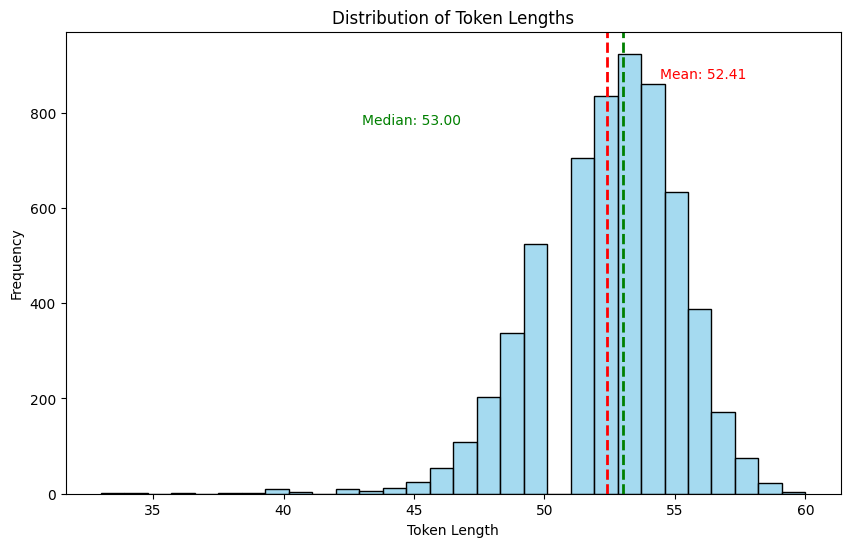

In [14]:
#统计图
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 假设这是您的 token_len_list

# 设置画布大小
plt.figure(figsize=(10, 6))

# 使用 seaborn 生成直方图
sns.histplot(token_len_list, bins=30, kde=False, color="skyblue", edgecolor="black")

# 添加标题和标签
plt.title("Distribution of Token Lengths")
plt.xlabel("Token Length")
plt.ylabel("Frequency")

# 显示平均值线
mean_value = np.mean(token_len_list)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_value + 2, plt.ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='red')

# 显示中位数线
median_value = np.median(token_len_list)
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2)
plt.text(median_value - 10, plt.ylim()[1]*0.8, f'Median: {median_value:.2f}', color='green')

# 显示图形
plt.show()

In [15]:
# 2. tokenize
def tokenize_function(examples):
    examples['label'] = [int(item) for item in examples['label']]
    return tokenizer(examples['sequence'], truncation=True, padding='max_length', max_length=128)

# 3. 对数据集应用分词函数
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# 4. 创建一个数据收集器，用于动态填充和遮蔽
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/53275 [00:00<?, ? examples/s]

Map:   0%|          | 0/5920 [00:00<?, ? examples/s]

In [22]:
from transformers import TrainingArguments, Trainer
import numpy as np
import torch.nn as nn



def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {'accuracy': (predictions==labels).sum() / len(labels)}

# change training hyperparameters to archive better quality
training_args = TrainingArguments(
    output_dir="ds_job_category_v0",
    learning_rate=1e-5,
    lr_scheduler_type="constant_with_warmup",
    warmup_ratio=0.1,
    optim='adamw_torch',
    weight_decay=0.0,
    per_device_train_batch_size=20,
    per_device_eval_batch_size=20,
    num_train_epochs=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

/root/miniconda3/lib/python3.12/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_2549/341301010.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [17]:
trainer.train()

TrainOutput(global_step=26640, training_loss=0.08990609108864724, metrics={'train_runtime': 3619.5996, 'train_samples_per_second': 147.185, 'train_steps_per_second': 7.36, 'total_flos': 3.4801460969472e+16, 'train_loss': 0.08990609108864724, 'epoch': 10.0})

In [20]:
#模型测试
import evaluate
predictions = trainer.predict(tokenized_datasets["test"])
preds = np.argmax(predictions.predictions, axis=-1)
metric = evaluate.load("glue", "mrpc")
ret = metric.compute(predictions=preds, references=predictions.label_ids)
ret

{'accuracy': 0.9253378378378379, 'f1': 0.927062706270627}

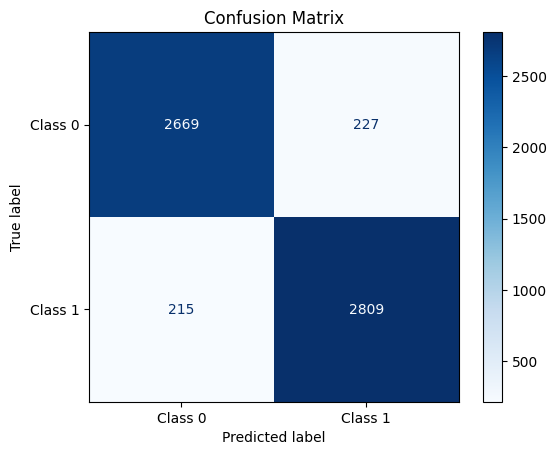

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 假设 predictions.label_ids 是真实的标签，preds 是模型的预测
cm = confusion_matrix(predictions.label_ids, preds)

# 可视化混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()